# Distance between veins

One key aspect we would like to determine is what is the distance between central and portal veins. For this we will load a full segmented image and work with the central and portal vein channels.

In [1]:
from pathlib import Path
import napari

from gulliver.io import get_image, get_labels_from_zarr, get_channel_from_zarr
from gulliver.quantify import find_distances
from gulliver.segmenter import relabel_by_values

c:\Users\agucor\Anaconda3\envs\bile_duct_clf\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
DATA_DIR = Path("../data/1-4 10x.zarr")

In [3]:
image = get_image(DATA_DIR, 0)

zarr image already exists


In [4]:
x_scale = image.attrs["multiscales"][0]["metadata"]["scale"]["x"]

In [5]:
portal_veins = get_labels_from_zarr(image, "portal_veins")
central_veins = get_labels_from_zarr(image, "central_veins")

In [6]:
portal_vein_table = find_distances(
    portal_veins,
    relative_to_mask=central_veins[:] > 0,
    suffix="portal_from_central_",
    scale=x_scale,
)

In [7]:
portal_vein_table

,portal_from_central__distance_max,portal_from_central__distance_min,portal_from_central__distance_mean,label
0,75.155855,10.480935,36.100989,1
1,210.601003,157.943313,182.313686,4
2,235.408608,183.729373,213.900387,5
3,357.310859,233.167965,295.919015,6
4,400.022062,328.427576,365.284335,16
5,250.406120,193.913641,224.438859,20
6,112.974787,85.132632,97.852993,23
7,204.493967,139.520043,169.938433,35
8,279.043872,219.700000,250.261711,36
9,254.023626,205.072682,227.173411,41


In [8]:
central_vein_table = find_distances(
    central_veins, portal_veins[:] > 1, suffix="central_from_portal"
)

In [9]:
distance_labeled_portals = relabel_by_values(
    portal_veins,
    labels=portal_vein_table.label.values,
    values=portal_vein_table.portal_from_central__distance_min.values,
)

04-Jan-24 15:01:43 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


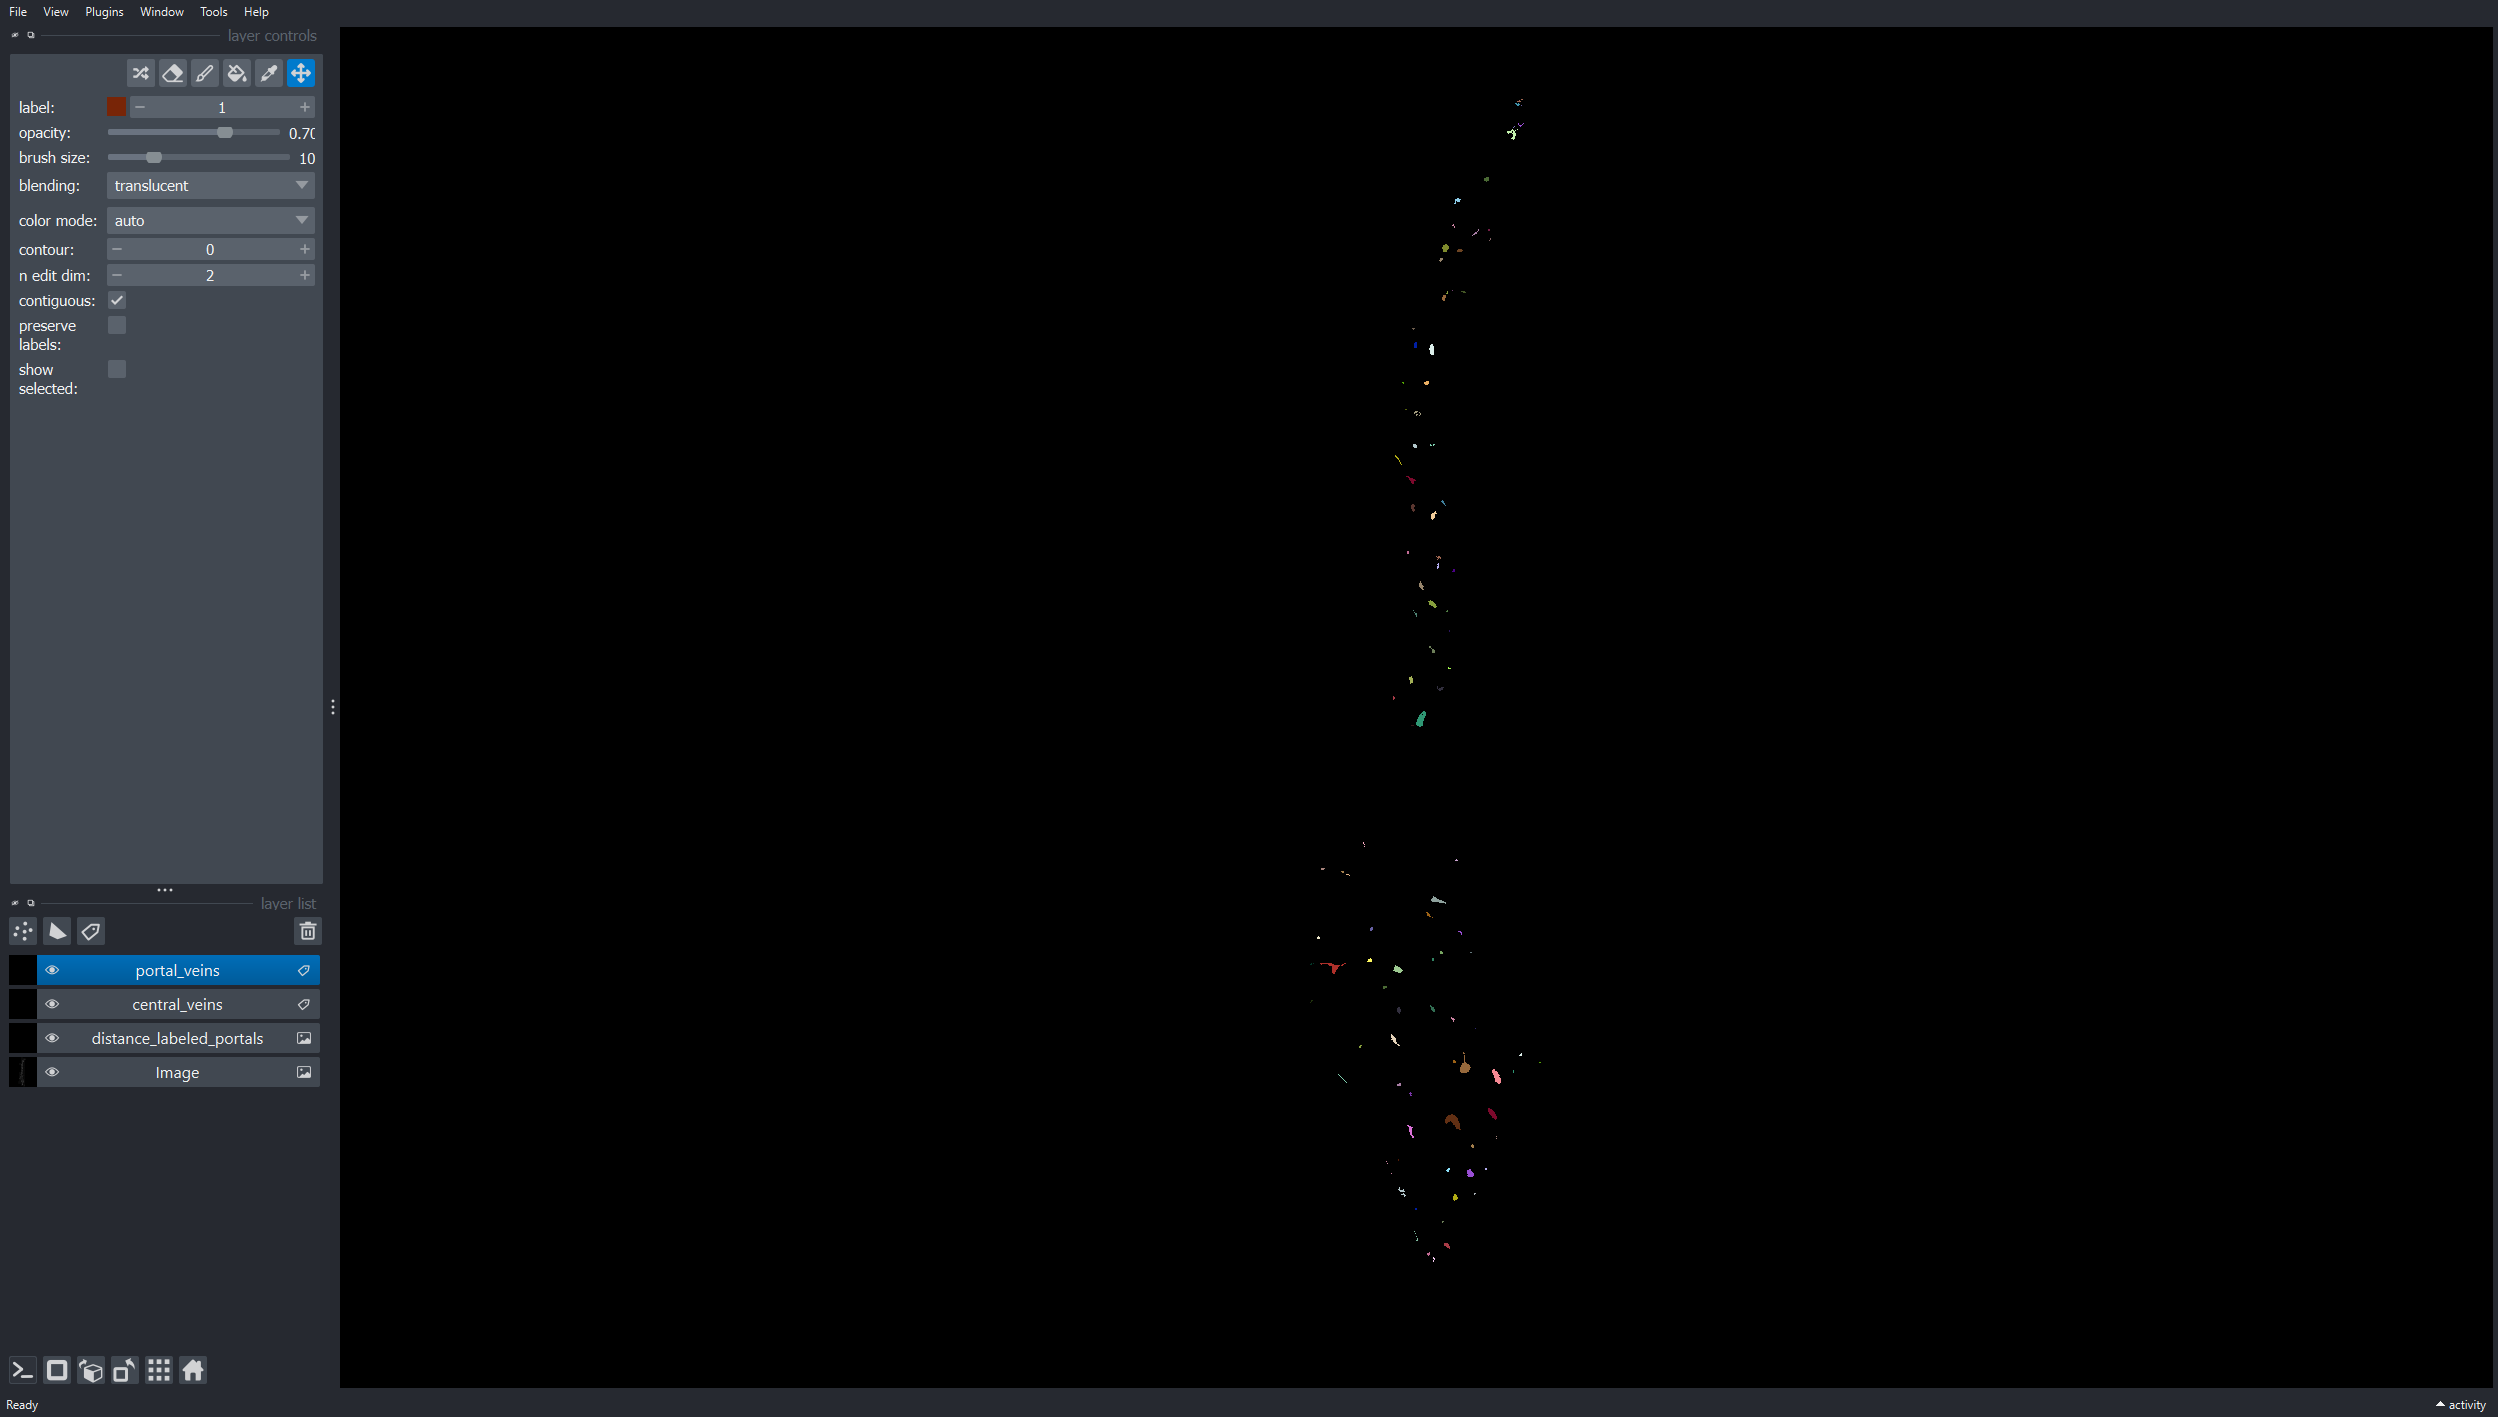

In [10]:
viewer = napari.Viewer()
viewer.add_image(
    get_channel_from_zarr(image, "Sox9"), contrast_limits=(0, 2**16)
)
viewer.add_image(distance_labeled_portals)
viewer.add_labels(central_veins)
viewer.add_labels(portal_veins)
napari.utils.nbscreenshot(viewer)

With these we can make tables saving the distances between veins and save them into excel files.

# Single Function

We can assess that the single funciton to describe veins is working.

In [11]:
from gulliver.quantify import get_vein_properties

In [12]:
portal_table = get_vein_properties(
    vein=portal_veins, other_vein=central_veins[:] > 0, scale=x_scale
)

In [13]:
portal_table

,area,eccentricity,distance_max,distance_min,distance_mean
label,,,,,
1,760.5000,0.949367,75.155855,10.480935,36.100989
4,1052.4475,0.764426,210.601003,157.943313,182.313686
5,401.7975,0.960834,235.408608,183.729373,213.900387
6,5290.9675,0.672570,357.310859,233.167965,295.919015
16,2423.8825,0.773614,400.022062,328.427576,365.284335
20,772.7525,0.956820,250.406120,193.913641,224.438859
23,399.2625,0.927174,112.974787,85.132632,97.852993
35,5119.8550,0.903997,204.493967,139.520043,169.938433
36,2062.2225,0.623569,279.043872,219.700000,250.261711
